In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy.fft as nf
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
def calculate_vel(df):
    temp=df.shift(periods=-1)
    diff_df=abs(df-temp)
    return diff_df

In [3]:
df=pd.read_csv('foot')

In [4]:
df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.000862,-0.1703,0.1090,0.1632,0.260
1,0.008249,-0.3669,-0.0686,0.0596,0.378
2,0.018286,0.0324,-0.0694,-0.1315,0.152
3,0.028170,0.1273,-0.1484,-0.1562,0.250
4,0.038256,0.2130,-0.1194,0.0532,0.250
...,...,...,...,...,...
63911,639.108631,0.7476,-0.0211,-0.1066,0.755
63912,639.119950,0.7143,-0.2169,0.3732,0.835
63913,639.128592,0.2942,-0.2650,0.5055,0.642
63914,639.138966,-0.4462,-0.2047,0.3415,0.598


Text(0, 0.5, 'aT m/s^2)')

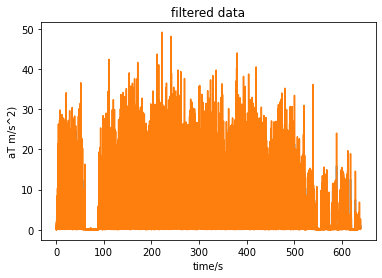

In [5]:
b, a = signal.butter(3, 0.15, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, df['aT (m/s^2)'])
#peaks,_ = signal.find_peaks(df['aT (m/s^2)'])
plt.plot(df['time'],low_passed)
plt.plot(df['time'],df['aT (m/s^2)'])
plt.title('filtered data')
plt.xlabel('time/s')
plt.ylabel('aT m/s^2)')

Text(0, 0.5, 'aT m/s^2')

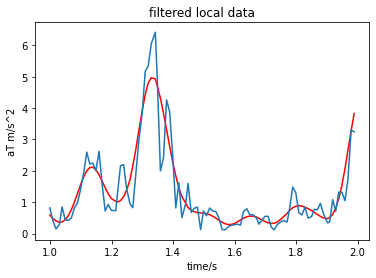

In [6]:
small_y=(df['aT (m/s^2)'][100:200]).to_numpy()
#print(small_y.to_numpy())
small_new_y = low_passed[100:200]
small_time=(df['time'][100:200]).to_numpy()
#print(small_new_y)
plt.plot(small_time,small_new_y,'r-')
plt.plot(small_time,small_y)
plt.title('filtered local data')
plt.xlabel('time/s')
plt.ylabel('aT m/s^2')

[ 1.03434012e-03 -8.54069776e-07]


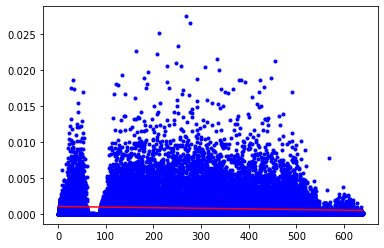

In [7]:
df2=df
df2['aT (m/s^2)']=low_passed
diff_df=calculate_vel(df2)
temp_df=diff_df.shift(periods=1)
temp_df.iloc[0]=df2.iloc[0]
df2['diff_time']=temp_df['time']
df2['velocity']=df2['diff_time']*df2['aT (m/s^2)']
df2['position']=df2['diff_time']*df2['velocity']
#linear regression
#error here, since we need the total position, need to fix later
X=np.stack([df2['time']],axis=1)
X_new=np.concatenate([np.ones(X.shape),X],axis=1)
model=LinearRegression(fit_intercept=False)
model.fit(X_new,df2['position'])
print(model.coef_)
plt.plot(df2['time'],df2['position'],'b.')
plt.plot(df2['time'],model.predict(X_new),'r-')

[-0.54917743  0.0869602 ]
0.984833678467106


Text(0, 0.5, 'total position')

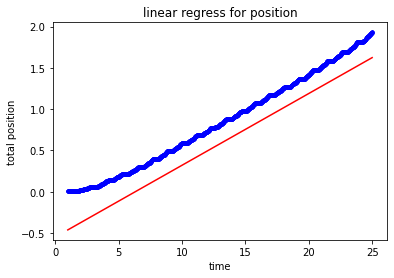

In [8]:
#linear regression with filter data
cum_df=df2
df2=df2.cumsum(axis=0)
cum_df['total_position']=df2['position']
#print(cum_df)
cum_X=np.stack([cum_df['time']],axis=1)
cum_with=np.concatenate([np.ones(cum_X.shape),cum_X],axis=1)
cum_model=LinearRegression(fit_intercept=False)
cum_model.fit(cum_with,cum_df['total_position'])
print(cum_model.coef_)
plt.plot(cum_df['time'][100:2500],cum_df['total_position'][100:2500],'b.')
plt.plot(cum_df['time'][100:2500],cum_model.predict(cum_with)[100:2500],'r-')
print(cum_model.score(cum_with,cum_df['total_position']))
plt.title('linear regress for position')
plt.xlabel('time')
plt.ylabel('total position')

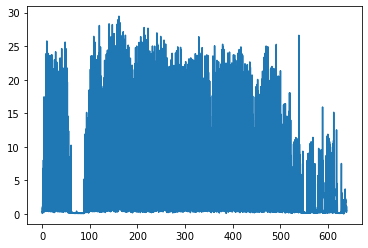

In [9]:
#write the original fft graph
sp=nf.fft(low_passed)
temp=sp.copy()
plt.plot(df['time'],low_passed)

In [10]:
#plt.subplot(2,2,1)
#plt.title('time domain',fontsize=16)
#plt.ylabel('signal',fontsize=12)
#times=np.arange(low_passed.size)/df['time']
#plt.plot(times[0:50],low_passed[0:50])

In [11]:
#time_filter=nf.ifft(temp)
#plt.subplot(2,2,2)
#plt.title('time domain',fontsize=16)
#plt.ylabel('filter signal',fontsize=12)
#plt.plot(times[0:50],time_filter[0:50])